<a href="https://colab.research.google.com/github/Shahrukh2016/Lead_Score_Prediction/blob/main/UniAcco_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**


Problem: Lead Scoring Model

Selling something is not an easy task. A business might have many potential customers, commonly referred as leads, but not enough resources to cater them all. Even most of the leads won’t turn into actual bookings. So there is a need for a system that prioritises the leads, and sorts them on the basis of a score, referred to here as lead score. So whenever a new lead is generated, this system analyses the features of the lead and gives it a score that correlates with chances of it being converted into booking. Such ranking of potential customers not only helps in saving time but also helps in increasing the conversion rate by letting the sales team figure out what leads to spend time on.

Here you have a dataset of leads with their set of features and their status. You have to build a ML model that predicts the lead score as an OUTPUT on the basis of the INPUT set of features. This lead score will range from 0-100, so more the lead score means more chances of conversion of lead to WON.
NOTE: The leads with STATUS other than ‘WON’ or ‘LOST’ can be dropped during training.

NOTE: Treat all columns as CATEGORICAL columns.

NOTE: This '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' represents NaN and could be present in more than one column.
Steps should be:

* Data Cleaning ( including Feature Selection)
* Training ( on Y percent of data)
* Testing ( on (100-Y) percent of data)
* Evaluate the performance using metrics such as accuracy, precision, recall and F1-score.

Dataset Link- https://drive.google.com/file/d/1nZIUn8CND8GOUp6bB2y4dI2Q8LQkBfqc/view?usp=share_link

# ***Let's Begin !***

## ***1. Knowing Data***

### Importing Libraries

In [ ]:
# Import Libraries
# For data visualisation
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

# For feature engineering ans selection 
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2  #feature selection for classification
from sklearn.metrics import recall_score    #to measure model performance

# Machine learning model selection and implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Importing classification metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading Dataset
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/UniAcco Internship/Data_Science_Internship - Dump.csv", index_col=0)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Lead Scoring Dataset: Rows= {df.shape[0]}, Columns= {df.shape[1]}")

Lead Scoring Dataset: Rows= 46608, Columns= 15


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46608 entries, 0 to 46607
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Agent_id        46608 non-null  object
 1   status          46608 non-null  object
 2   lost_reason     43244 non-null  object
 3   budget          42908 non-null  object
 4   lease           44267 non-null  object
 5   movein          32970 non-null  object
 6   source          46608 non-null  object
 7   source_city     46608 non-null  object
 8   source_country  46608 non-null  object
 9   utm_source      46608 non-null  object
 10  utm_medium      46608 non-null  object
 11  des_city        46608 non-null  object
 12  des_country     46608 non-null  object
 13  room_type       23061 non-null  object
 14  lead_id         46608 non-null  object
dtypes: object(15)
memory usage: 5.7+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f"The total number of duplicated observations in the dataset: {df.duplicated().sum()}")

The total number of duplicated observations in the dataset: 10


We have 10 duplicate observations in our dataset, let's drop them first.

In [ ]:
# Dropping duplicate observations
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
# Rechecking Duplicate Value Count
print(f"The total number of duplicated observations in the dataset: {df.duplicated().sum()}")

The total number of duplicated observations in the dataset: 0


Great! We have sucessfully dropped the duplicated observations.

#### Missing Values/Null Values

We have given in the problem statement that '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' represents NaN and could be present in more than one column. So we will replace it by np.nan and then proceed our analysis.

In [ ]:
# Replacing given value to null to null value
for i in df.columns:
  df[i].replace(to_replace={"9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0":np.nan}, inplace=True)

In [ ]:
# Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(df.isna().sum())
print("-"*50)

# Percentage of null values in each category
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = df.isnull().sum()/len(df)
print(f"{null_count_by_variable*100}%")
print("-"*50)

--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
Agent_id              0
status                0
lost_reason        3363
budget             3693
lease              2339
movein            13633
source             5972
source_city        8841
source_country     8631
utm_source           61
utm_medium         3186
des_city           2536
des_country        2536
room_type         23537
lead_id               0
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
Agent_id           0.000000
status             0.000000
lost_reason        7.217048
budget             7.925233
lease              5.019529
movein            29.256620
source            12.816001
source_city       18.972917
source_country    18.522254
utm_source         0.130907
utm_medium         6.837203
des_city           5.442294

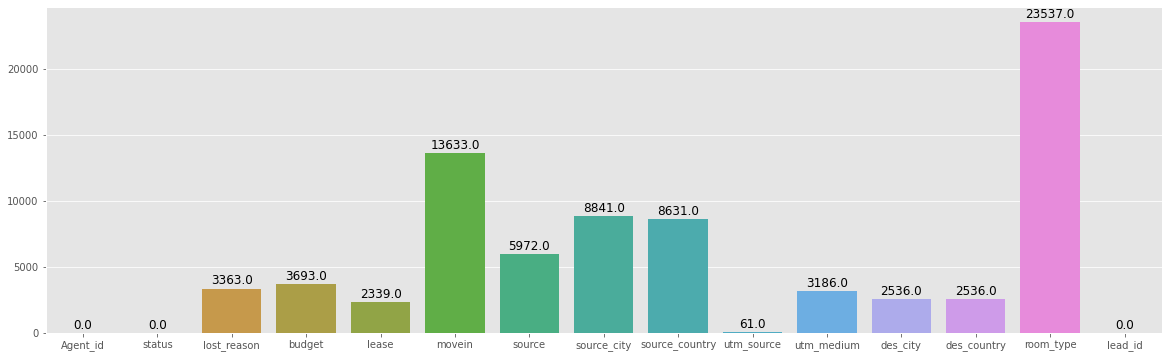

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(20,6))
plots= sns.barplot(x=df.columns,y=df.isna().sum())

for bar in plots.patches:
      plots.annotate(bar.get_height(),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=12, xytext=(0, 8),
                     textcoords='offset points')
plt.show()

We get to know the following points about our dataset:

* The dataset contains Rows= 46608, Columns= 15.
* The dataset had 10 duplicated observations and we have dropped it since it was of no use.
* Percentage of null values in attributes:
    * lost_reason -        7.21%
    *budget -            7.92%
    *lease -             5.01%
    *movein -           29.25%
    *source -           12.81%
    *source_city -      18.97%
    *source_country -   18.52%
    *utm_source  -       0.13%
    *utm_medium  -       6.83%
    *des_city  -         5.44%
    *des_country -       5.44%
    *room_type -        50.51%

## ***2. Understanding Variables***

In [ ]:
# Dataset Describe
df.describe().T

,count,unique,top,freq
Agent_id,46598,120,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,8177
status,46598,6,LOST,43235
lost_reason,43235,30,Low availability,8883
budget,42905,1857,£60 - £120 Per week,9862
lease,44259,311,Full Year Course Stay 40 - 44 weeks,11111
movein,32965,477,10/09/22,2452
source,40626,682,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,19306
source_city,37757,4335,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,3044
source_country,37967,185,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,18812
utm_source,46537,34,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,31125


Since the exact meaning of the atributes are not mentioned in the problem statement. So, we are assuming the following variable description from the sales perspective:

* 'Agent_id': This column represents the unique identifier of the sales agent who is handling the lead.

* 'Status': This column represents the current status of the lead in the sales pipeline. The status can be "New", "In progress", "WON", "LOST", or "Closed".

* 'Lost_reason': This column represents the reason why the lead was lost, if applicable. Reasons may include "Price", "Location", "Size", "Competition", "Timing", or "Other".

* 'Budget': This column represents the budget of the lead, or the maximum amount they are willing to spend on the product or service being offered.

* 'Lease': This column represents the lease duration that the lead is interested in, if applicable.

* 'Movein': This column represents the expected move-in date for the lead, if applicable.

* 'Source': This column represents the original source of the lead, such as a website, referral, or advertising campaign.

* 'Source_city': This column represents the city where the lead originated from, if applicable.

* 'Source_country': This column represents the country where the lead originated from, if applicable.

* 'Utm_source': This column represents the specific source of the lead, such as a particular website or advertising platform.

* 'Utm_medium': This column represents the medium through which the lead was acquired, such as email, social media, or paid search.

* 'Des_city': This column represents the city where the lead is interested in renting or buying, if applicable.

* 'Des_country': This column represents the country where the lead is interested in renting or buying, if applicable.

* 'Room_type': This column represents the type of room or property that the lead is interested in. Like Ensuite, Studio, Entire Place,Non-Ensuite and Twin-Studio.

* 'Lead_id': This column represents the unique identifier of the lead in the sales database.

### Unique Values for each variable.

In [ ]:
# Checking Unique Values for each variable.
print(f"The number of unique values in: ")
print("-"*35)
for i in df.columns:
  print(f"'{i}' : {df[i].nunique()}")

The number of unique values in: 
-----------------------------------
'Agent_id' : 120
'status' : 6
'lost_reason' : 30
'budget' : 1857
'lease' : 311
'movein' : 477
'source' : 682
'source_city' : 4335
'source_country' : 185
'utm_source' : 34
'utm_medium' : 63
'des_city' : 219
'des_country' : 14
'room_type' : 5
'lead_id' : 30574


We will treat all the feature as categorical features as per our problem statement.

##  ***3. Data Wrangling***

### 1. Considering Required Subset:

Since we are concerned with the leads that are in either of the two categories i.s 'WON' or 'LOST' (Mentioned in the problem statement). So we are considering only these two categories and exclude others.

In [ ]:
# Storing the requierd values in the new dataframe
df_new= df[(df['status']== 'WON') | (df['status']=='LOST')]

# Checking shape
print(f"Before: {df.shape}")
print(f'After: {df_new.shape}')

Before: (46598, 15)
After: (46307, 15)


In [ ]:
df_new['status'].value_counts()

LOST    43235
WON      3072
Name: status, dtype: int64

### 2. Handling Null Values:

In [ ]:
# Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(df_new.isna().sum())
print("-"*50)

# Percentage of null values in each category
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = df_new.isnull().sum()/len(df)
print(f"{null_count_by_variable*100}%")
print("-"*50)

--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
Agent_id              0
status                0
lost_reason        3072
budget             3687
lease              2334
movein            13605
source             5946
source_city        8821
source_country     8612
utm_source           61
utm_medium         3183
des_city           2528
des_country        2528
room_type         23481
lead_id               0
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
Agent_id           0.000000
status             0.000000
lost_reason        6.592558
budget             7.912357
lease              5.008799
movein            29.196532
source            12.760204
source_city       18.929997
source_country    18.481480
utm_source         0.130907
utm_medium         6.830765
des_city           5.425126

In [ ]:
null_value_list= ['lost_reason','budget','lease','utm_source','utm_medium','des_city','des_country','movein','source','source_city','source_country']
for i in null_value_list:
  print(f"Variable- {i}: ")
  print(f"Percentage of MODE value: {round(df_new[i].value_counts()[0]*100/df_new[i].shape[0],2)} %")
  print("-"*50)

Variable- lost_reason: 
Percentage of MODE value: 19.18 %
--------------------------------------------------
Variable- budget: 
Percentage of MODE value: 21.06 %
--------------------------------------------------
Variable- lease: 
Percentage of MODE value: 23.75 %
--------------------------------------------------
Variable- utm_source: 
Percentage of MODE value: 66.67 %
--------------------------------------------------
Variable- utm_medium: 
Percentage of MODE value: 68.03 %
--------------------------------------------------
Variable- des_city: 
Percentage of MODE value: 15.81 %
--------------------------------------------------
Variable- des_country: 
Percentage of MODE value: 91.53 %
--------------------------------------------------
Variable- movein: 
Percentage of MODE value: 5.29 %
--------------------------------------------------
Variable- source: 
Percentage of MODE value: 41.23 %
--------------------------------------------------
Variable- source_city: 
Percentage of MODE val

Since we are having different percentage of null values in different columns, we will deal them accordingly:
* Dropping null values having < 1% null values OR MODE value < 40%:
    * No variable falling in this category

* Replacing null values having average(5%-50%) amount of null percentage OR having MODE value > 40%:
    * source
    * source_city 
    * source_country
    * utm_source
    * utm_medium
    * des_country
    * lost_reason
    * budget
    * lease
    * des_city
    * movein
* Dropping feature having > 50% mull value:
    * room_type

In [ ]:
# Handling null values as per discussion
df_new['source'].fillna(df['source'].mode()[0], inplace=True)
df_new['source_city'].fillna(df['source_city'].mode()[0], inplace=True)
df_new['source_country'].fillna(df['source_country'].mode()[0], inplace=True)
df_new['utm_source'].fillna(df['utm_source'].mode()[0], inplace=True)
df_new['utm_medium'].fillna(df['utm_medium'].mode()[0], inplace=True)
df_new['des_country'].fillna(df['des_country'].mode()[0], inplace=True)
df_new['lost_reason'].fillna(df['lost_reason'].mode()[0], inplace=True)
df_new['budget'].fillna(df['budget'].mode()[0], inplace=True)
df_new['lease'].fillna(df['lease'].mode()[0], inplace=True)
df_new['des_city'].fillna(df['des_city'].mode()[0], inplace=True)
df_new['movein'].fillna(df['movein'].mode()[0], inplace=True)

# Dropping room_type feature
df_new.drop(['room_type'],axis=1,inplace=True)

In [ ]:
# Rechecking Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(df_new.isna().sum())
print("-"*50)

# Rechecking Percentage of null values in each category
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = df_new.isnull().sum()/len(df)
print(f"{null_count_by_variable*100}%")
print("-"*50)

--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
Agent_id          0
status            0
lost_reason       0
budget            0
lease             0
movein            0
source            0
source_city       0
source_country    0
utm_source        0
utm_medium        0
des_city          0
des_country       0
lead_id           0
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
Agent_id          0.0
status            0.0
lost_reason       0.0
budget            0.0
lease             0.0
movein            0.0
source            0.0
source_city       0.0
source_country    0.0
utm_source        0.0
utm_medium        0.0
des_city          0.0
des_country       0.0
lead_id           0.0
dtype: float64%
--------------------------------------------------


### 3. Typecasting:

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46307 entries, 0 to 46607
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Agent_id        46307 non-null  object
 1   status          46307 non-null  object
 2   lost_reason     46307 non-null  object
 3   budget          46307 non-null  object
 4   lease           46307 non-null  object
 5   movein          46307 non-null  object
 6   source          46307 non-null  object
 7   source_city     46307 non-null  object
 8   source_country  46307 non-null  object
 9   utm_source      46307 non-null  object
 10  utm_medium      46307 non-null  object
 11  des_city        46307 non-null  object
 12  des_country     46307 non-null  object
 13  lead_id         46307 non-null  object
dtypes: object(14)
memory usage: 5.3+ MB


In [ ]:
# Typecasting movin variable into datetime format
df_new["movein"]= pd.to_datetime(df_new["movein"],format="%d/%m/%y")

In [ ]:
# Reching the info after typecasting
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46307 entries, 0 to 46607
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Agent_id        46307 non-null  object        
 1   status          46307 non-null  object        
 2   lost_reason     46307 non-null  object        
 3   budget          46307 non-null  object        
 4   lease           46307 non-null  object        
 5   movein          46307 non-null  datetime64[ns]
 6   source          46307 non-null  object        
 7   source_city     46307 non-null  object        
 8   source_country  46307 non-null  object        
 9   utm_source      46307 non-null  object        
 10  utm_medium      46307 non-null  object        
 11  des_city        46307 non-null  object        
 12  des_country     46307 non-null  object        
 13  lead_id         46307 non-null  object        
dtypes: datetime64[ns](1), object(13)
memory usage: 5.3+ MB

Since we have only one feature 'movein' that needs typecasting. So we are good to go now.

## ***4. Feature Engineering & Data Pre-processing***

### 1. Categorical Encoding

#### a. Mapping 'LOST' with 0 and 'WON' with 1:

To feed out data as ML model input first we have to make our target variable as numeric.

In [ ]:
# Encoding the target variable (status)
df_new['status'] = df_new['status'].map({'WON':1, 'LOST':0})

# Rechecking the value counts after mapping
df_new['status'].value_counts()

0    43235
1     3072
Name: status, dtype: int64

#### b. Performing Label Encoding on object type categorical columns:

We have features with very large categories, so we will perform LABEL ENCODING inplace of ONE-HOT ENCODING.

In [ ]:
# Storing object type categorical columns on which we want to perform Label Encoding
object_type_cat_column= ['Agent_id', 'lost_reason', 'budget', 'lease', 'source', 'source_city', 'source_country', 'utm_source', 'utm_medium', 'des_city', 'des_country', 'lead_id']

In [ ]:
# Importing library for Label Encoding
from sklearn.preprocessing import LabelEncoder

# Creating object
encoder= LabelEncoder()

# Fitting and Transforming
for i in object_type_cat_column:
  df_new[i]= encoder.fit_transform(df_new[i])

# Rechecking the first 5 observations after encoding
df_new.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,lead_id
0,12,0,21,1834,266,2022-09-10,343,3995,165,5,10,205,8,24421
1,20,0,16,1834,266,2022-09-10,343,3995,165,5,10,74,8,22037
2,87,0,21,1752,266,2022-08-31,343,2619,165,25,3,18,8,17924
3,110,0,16,10,2,2022-09-10,507,2817,165,25,3,26,8,3582
4,12,0,8,1834,266,2022-09-10,343,3995,165,5,10,205,8,30016


### 2. Feature Engineering

#### a. Feature Extraction

Extracting date, month and year from movein feature:

In [ ]:
# Extracting date, month and year from movein feature
df_new["Day"]= df_new["movein"].dt.day
df_new["Month"]= df_new["movein"].dt.month
df_new["Year"]= df_new["movein"].dt.year

# Dropping original movein feature as we have extracted the infomation
df_new.drop(['movein'], axis=1, inplace=True)

# Rechecking the info after conversion
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46307 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Agent_id        46307 non-null  int64
 1   status          46307 non-null  int64
 2   lost_reason     46307 non-null  int64
 3   budget          46307 non-null  int64
 4   lease           46307 non-null  int64
 5   source          46307 non-null  int64
 6   source_city     46307 non-null  int64
 7   source_country  46307 non-null  int64
 8   utm_source      46307 non-null  int64
 9   utm_medium      46307 non-null  int64
 10  des_city        46307 non-null  int64
 11  des_country     46307 non-null  int64
 12  lead_id         46307 non-null  int64
 13  Day             46307 non-null  int64
 14  Month           46307 non-null  int64
 15  Year            46307 non-null  int64
dtypes: int64(16)
memory usage: 6.0 MB


#### b. Feature Selection

<AxesSubplot:>

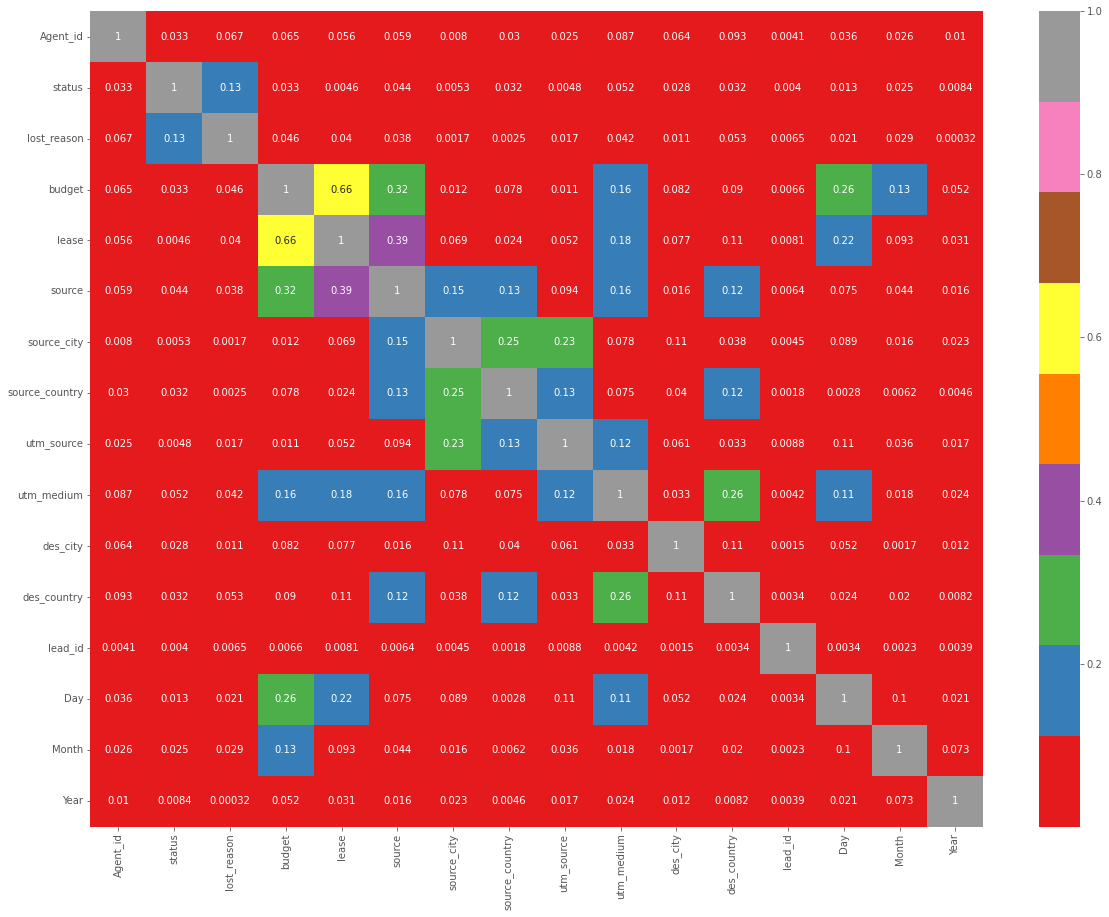

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,15))
sns.heatmap(abs(df_new.corr()), annot=True, cmap=sns.color_palette("Set1"))

Let's include only those features in our final dataframe that are highly impacting on the dependent variable. For this we are using Variance Inflation Factor technique to determine multicolinearity.

In [ ]:
# Defining a function for variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
df_new.columns

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'source',
       'source_city', 'source_country', 'utm_source', 'utm_medium', 'des_city',
       'des_country', 'lead_id', 'Day', 'Month', 'Year'],
      dtype='object')

In [ ]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ['status']]])

,variables,VIF
0,Agent_id,3.199916
1,lost_reason,10.608141
2,budget,9.490866
3,lease,10.276803
4,source,13.835940
5,source_city,5.996518
6,source_country,12.645123
7,utm_source,13.639425
8,utm_medium,1.656494
9,des_city,4.259985


In [ ]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ['status','Year']]])

,variables,VIF
0,Agent_id,3.191925
1,lost_reason,10.169683
2,budget,9.375485
3,lease,10.050478
4,source,12.073331
5,source_city,5.824396
6,source_country,12.141038
7,utm_source,12.677096
8,utm_medium,1.577137
9,des_city,4.222970


In [ ]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ['status','Year','lease']]])

,variables,VIF
0,Agent_id,3.191694
1,lost_reason,10.158226
2,budget,5.837920
3,source,11.415593
4,source_city,5.800113
5,source_country,12.138320
6,utm_source,12.529347
7,utm_medium,1.576737
8,des_city,4.221464
9,des_country,46.129740


In [ ]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ['status','Year','lease','utm_source']]])

,variables,VIF
0,Agent_id,3.187097
1,lost_reason,10.103407
2,budget,5.828801
3,source,11.036688
4,source_city,5.696113
5,source_country,12.123285
6,utm_medium,1.572779
7,des_city,4.219710
8,des_country,43.942037
9,lead_id,3.924884


In [ ]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ['status','Year','lease','utm_source','lead_id']]])

,variables,VIF
0,Agent_id,3.186567
1,lost_reason,10.097969
2,budget,5.824462
3,source,10.999844
4,source_city,5.695102
5,source_country,12.116147
6,utm_medium,1.572119
7,des_city,4.219314
8,des_country,43.627152
9,Day,4.024998


In [ ]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ['status','Year','lease','utm_source','lead_id','des_country']]])

,variables,VIF
0,Agent_id,3.148762
1,lost_reason,9.711059
2,budget,5.561723
3,source,10.558354
4,source_city,5.647109
5,source_country,11.402655
6,utm_medium,1.532574
7,des_city,4.046786
8,Day,3.989865
9,Month,28.132578


In [ ]:
df_new.columns

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'source',
       'source_city', 'source_country', 'utm_source', 'utm_medium', 'des_city',
       'des_country', 'lead_id', 'Day', 'Month', 'Year'],
      dtype='object')

In [ ]:
# Creating final dataframe considering above selected features
df_new=df_new[["Agent_id","lost_reason","budget","source","source_city","source_country","utm_medium","des_city","Day","Month","status"]]

In [ ]:
df_new.sample(5)

,Agent_id,lost_reason,budget,source,source_city,source_country,utm_medium,des_city,Day,Month,status
37452,116,20,10,507,2204,165,3,59,10,9,0
17730,13,15,1834,343,594,144,3,74,17,9,1
33964,18,21,1793,343,2520,165,3,135,10,9,0
2036,27,10,751,349,3045,170,3,196,10,9,0
35582,15,15,1834,343,2273,165,39,174,31,8,1


### 3. Data Splitting

In [ ]:
# Spliting the data to train and test.
x= df_new.drop(columns='status',axis=1)
y= df_new[['status']]

## Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

## Spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
# Checking the distribution of classes in training and testing sets
print("Distribution of classes of dependent variable in train :")
print(y_train.value_counts())

print("Distribution of classes of dependent variable in test :")
print(y_test.value_counts())

Distribution of classes of dependent variable in train :
status
0         34587
1          2458
dtype: int64
Distribution of classes of dependent variable in test :
status
0         8648
1          614
dtype: int64


Clearly we have imbalanced dataset. We will use SMOTE and balance the data before training.

### 4. Handling Imbalanced Dataset

In [ ]:
# Importing SMOTE for balancing the dataset
from imblearn.over_sampling import SMOTE

# Fitting the data
smote = SMOTE(sampling_strategy='minority', random_state=0)
x_sm, y_sm = smote.fit_resample(x, y)

# Checking Value counts for both classes Before and After handling Class Imbalance:
for col,label in [[y,"Before"],[y_sm,'After']]:
  print(label+' Handling Class Imbalace:')
  print(col.value_counts(),'\n')

Before Handling Class Imbalace:
status
0         43235
1          3072
dtype: int64 

After Handling Class Imbalace:
status
0         43235
1         43235
dtype: int64 



In [ ]:
# Respliting the dataset after using SMOTE
x_smote_train, x_smote_test, y_smote_train, y_smote_test = train_test_split(x_sm,y_sm , test_size = 0.2, random_state = 0) 

### 5. Data Scaling

In [ ]:
# Importing StandardScaler for Data Scaling
from sklearn.preprocessing import StandardScaler

# Creating object
std_scaler= StandardScaler()

# Fit and Transform
x_smote_train= std_scaler.fit_transform(x_smote_train)
x_smote_test= std_scaler.transform(x_smote_test)

## ***5. ML Model Implementation***

In [ ]:
# Defining a function to train the input model and print evaluation matrics such as classification report, confusion matrix and AUC-ROC curve in visualize format
def analyse_model(model, x_train, x_test, y_train, y_test):

  '''Takes classifier model, train-set and test-set as input and prints the evaluation matrices in visualize format and returns the model'''

  # Fitting the model
  model.fit(x_train,y_train)

  # Finding best parameters
  try:
    print(f"The best parameters are: {model.best_params_}")
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((x_train, y_train, 'Train-Set'),(x_test, y_test, "Test-Set")):

    # Getting required metrics
    pred = model.predict(x)
    pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(act, pred_proba)

    # Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-2].T, annot=True, cmap=sns.color_palette("crest", as_cmap=True),fmt=".2f",annot_kws={"fontsize":14, "fontweight":"bold"},linewidths=1.0)
    plt.title(f'{label} Classification Report')
    
    # Confusion Matrix
    plt.subplot(1,3,2)
    matrix= confusion_matrix(y_true=act, y_pred=pred)
    sns.heatmap(matrix, annot=True, cmap=sns.color_palette("flare", as_cmap=True),fmt=".2f", annot_kws={"fontsize":14, "fontweight":"bold"},linewidths=1.0)
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    
    # AUC_ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  plt.show()

  return model

Considering our problem statement we have to classify the lead. For our situation we are more concerned about FN(FALSE NEGATIVE) cases as we do not want our model to predict WON leads as LOST leads (this can hamper the business badly). Also accuracy and AUC-ROC will also essential metrics as it distinguishes the either two classes. So we will consider RECALL, ACCURACY, F1 SCORE and AUC-ROC as our final metrics

### ML Model - 1 (Logistic Regression)

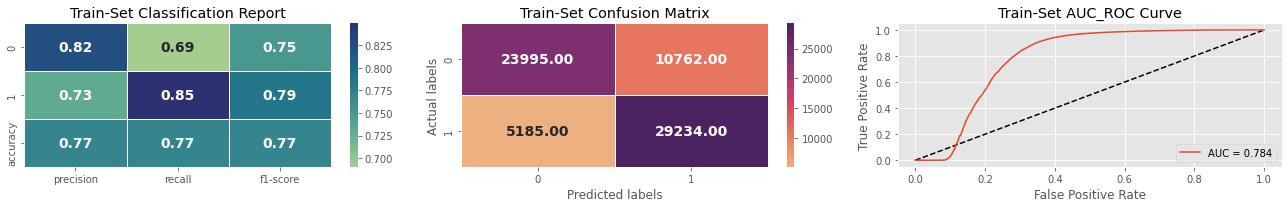

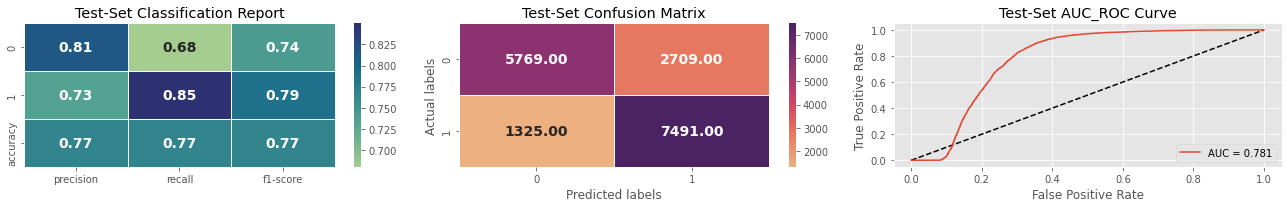

LogisticRegression(max_iter=20000, random_state=0)

In [ ]:
# Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression Model and Visualizing evaluation Metric Score chart
logistic_classifier = LogisticRegression(fit_intercept=True, penalty='l2',max_iter=20000,random_state=0)
analyse_model(logistic_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

It is clear from the above plotted matrix that we are getting 1325 FN cases and that is not good for us, we are missing some of the WON lead. On the other hand we are getting the F1 score of 0.74 and 0.79 which is still not much good. We are not maintaining the trade-off between the precision and recall from Logistic Regression. Let's move to our second model and see if we are getting the improvement in metrics.

### ML Model - 2 (KNN)

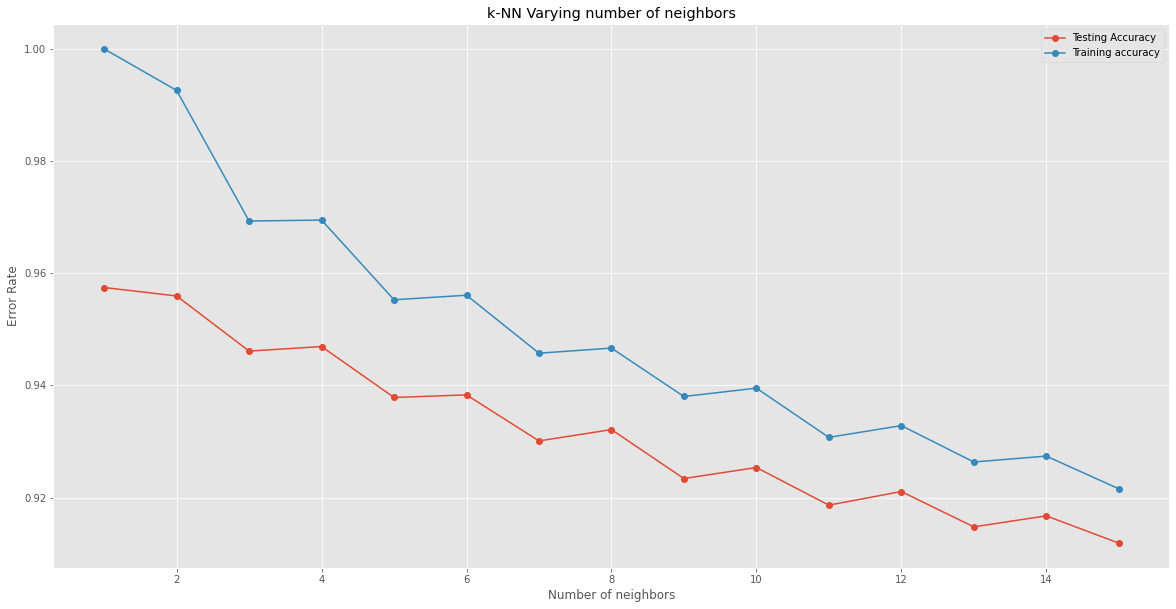

In [ ]:
## Determining the value of k in KNN
# Importing GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,16)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(x_smote_train, y_smote_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_smote_train, y_smote_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_smote_test, y_smote_test)

plt.figure(figsize=(20,10))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy', marker='o')
plt.plot(neighbors, train_accuracy, label='Training accuracy', marker='o')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Error Rate')
plt.show()

Semms from the above graph that after the value of 13 neighbours the error is not fluctuating much. So we will consider n_neighbours as 13.

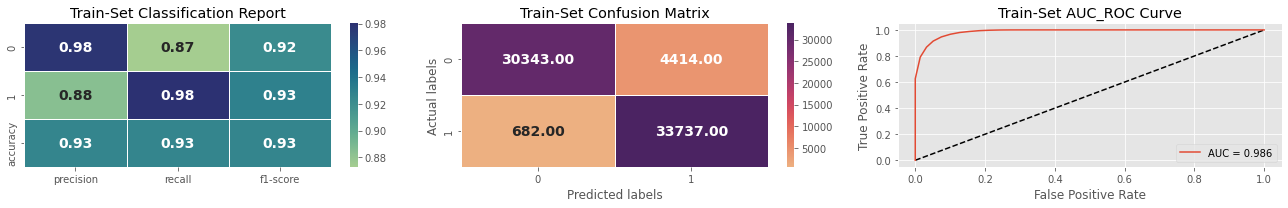

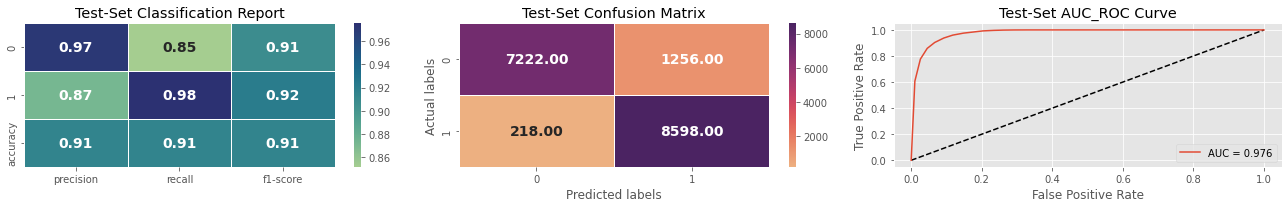

KNeighborsClassifier(n_neighbors=13)

In [ ]:
# Importing GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Fitting KNeighborsClassifier Model
KNN_classifier = KNeighborsClassifier(n_neighbors=13,p=2,metric='minkowski')

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model(KNN_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

By implimenting KNN we are getting the improved metrics, the recall for minority class in test dataset is 98% and that is pretty good and the accuracy is improved to 91% and same for AUC-ROC improves to 97%. But the recall for majority class can be improved further. Let's impliment our third model and see the results.

### ML Model - 3 (XGboost)

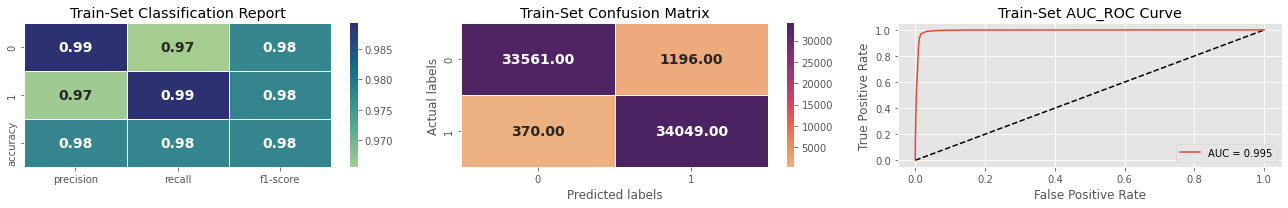

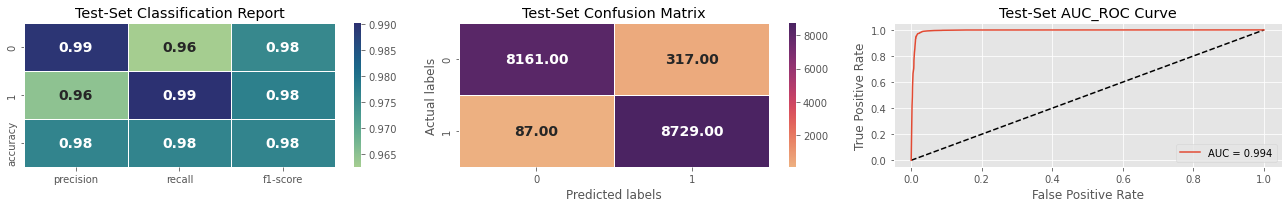

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [ ]:
# Importing RandomForestClassifier
from xgboost import XGBClassifier

# Fitting XGBClassifier Model
XGB_classifier = XGBClassifier(n_estimators=100,max_depth=1,n_jobs=-1,random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(XGB_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

Cool, the results are pretty amazing. Let's peroform hyperparameter tuning and then we will conclude our model.

#### 2. Cross- Validation & Hyperparameter Tuning

The best parameters are: {'learning_rate': 1, 'max_depth': 2, 'n_estimators': 300}


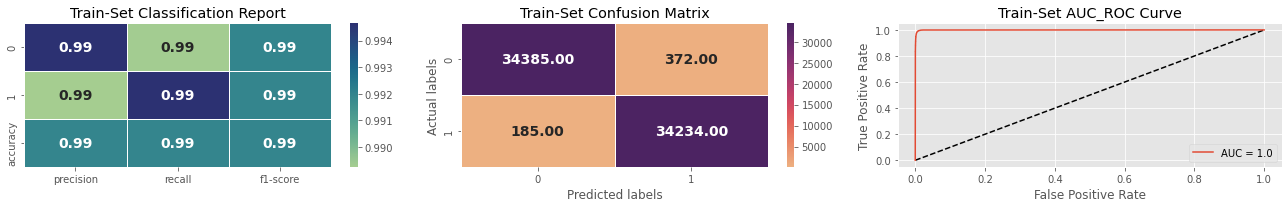

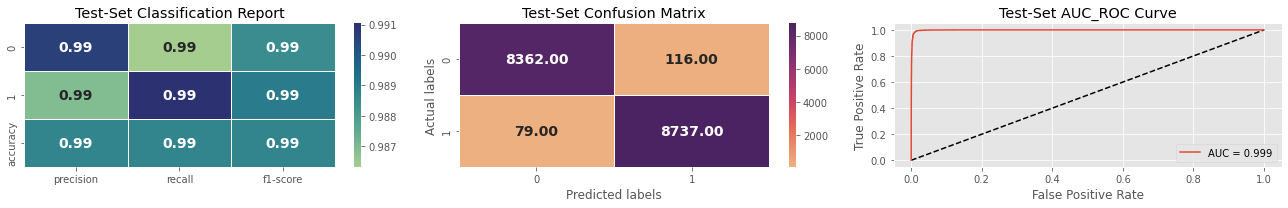

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...ne,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1, 1], 'max_depth': [1, 2],
                         'n_estimators': [250, 300]},
             scoring='roc_auc')

In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Defining classifier instance
classifier= XGBClassifier(random_state=0)

# Defining parameters
grid_values = {'learning_rate':[0.01, 0.1,1],'n_estimators':[250,300], 'max_depth':[1,2]}

# Fitting RandomForestClassifier Model with GridSearchCV
XGB_grid_classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=3)

# Analysing the model
analyse_model(XGB_grid_classifier, x_smote_train, x_smote_test, y_smote_train, y_smote_test)

Interesting, by performing the hyperparameter tuning we are getting the recall of 0.99 for the majority and minority class. Accuracy of 99% and AUC-ROC curve of 0.99 that means our model is perfectly predicting the either of the classes and able to distinguish between the two classes. Also the F1 score is also of 0.99 that means we are correclty able to maintain the trade-off between the both classes.

# **Conclusion**

The best metrics we are getting from XGboost and considering XGboost as our final optimal model:
1. Accuracy: 99%
2. Recall: 0.99
3. Precision: 0.99
4. F1 SCORE: 0.99
5. AUC-ROC: 0.99